### Notes:
In v2, the full dataset has been used to train the model from https://worldhappiness.report/
DataPanelWHR2021C2.xls, and has been filtered to remove any empty rows, all years have been used from 2008-2020

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model   
import pandas as pd
import numpy as np

In [43]:
file = '../Data/Life_Ladder_All_Years_csv.csv'
df = pd.read_csv(file)


# Multiple Linear Regression

Multiple linear regression simply means that you have more than one feature variable.

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

In [44]:
df.tail(10)

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2088,Zimbabwe,4.955,7.983,0.896,49.540,0.470,-0.103,0.859,0.669,0.177
2089,Zimbabwe,4.690,7.985,0.799,50.960,0.576,-0.104,0.831,0.712,0.182
2090,Zimbabwe,4.184,7.991,0.766,52.380,0.642,-0.074,0.820,0.725,0.239
2091,Zimbabwe,3.703,7.992,0.736,53.800,0.667,-0.123,0.810,0.715,0.179
2092,Zimbabwe,3.735,7.984,0.768,54.400,0.733,-0.095,0.724,0.738,0.209
2093,Zimbabwe,3.638,8.016,0.754,55.000,0.753,-0.098,0.751,0.806,0.224
2094,Zimbabwe,3.616,8.049,0.775,55.600,0.763,-0.068,0.844,0.710,0.212
2095,Zimbabwe,2.694,7.950,0.759,56.200,0.632,-0.064,0.831,0.716,0.235
2096,Zimbabwe,3.160,7.829,0.717,56.800,0.643,-0.009,0.789,0.703,0.346
2097,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,NaN,NaN


In [45]:
df.count()

Country name                        2098
Life Ladder                         2098
Log GDP per capita                  2062
Social support                      2085
Healthy life expectancy at birth    2043
Freedom to make life choices        2066
Generosity                          2009
Perceptions of corruption           1988
Positive affect                     1927
Negative affect                     1933
dtype: int64

In [46]:
clean_data=df
clean_data.count()

Country name                        2098
Life Ladder                         2098
Log GDP per capita                  2062
Social support                      2085
Healthy life expectancy at birth    2043
Freedom to make life choices        2066
Generosity                          2009
Perceptions of corruption           1988
Positive affect                     1927
Negative affect                     1933
dtype: int64

In [47]:
#getting the number of empty rows
clean_data.isnull().sum()

Country name                          0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                     171
Negative affect                     165
dtype: int64

In [48]:
clean_data.dropna(inplace=True)

In [49]:
clean_data.head(10)

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [50]:
clean_data.isnull().sum()

Country name                        0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [51]:


#clean_data.to_csv('cleaned_data_all_years.csv', index=False)


In [52]:
clean_data.count()

Country name                        1708
Life Ladder                         1708
Log GDP per capita                  1708
Social support                      1708
Healthy life expectancy at birth    1708
Freedom to make life choices        1708
Generosity                          1708
Perceptions of corruption           1708
Positive affect                     1708
Negative affect                     1708
dtype: int64

In [53]:
clean_data.dtypes

Country name                         object
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [54]:
clean_data = df.drop(columns=['Country name'])

#### Define Features, Target
#### Split Data into Training & Test
#### Fit the model

In [55]:
X = clean_data.drop(columns='Life Ladder', axis=1)
y= clean_data['Life Ladder']

In [56]:
from sklearn.model_selection import train_test_split
from collections import Counter
#70% of data is for training the dataset, & 30% is for testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Counter(y_train)

### Implement a linear model:

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting our model with all our features in X
model.fit(X_train, y_train)

LinearRegression()

#### Model equation $y_i = \beta_0 + \beta_1x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon $
#### $y_i = dependent variable $
#### $x_i = expanatory variables $
#### $\beta_0 = y-intercept $
#### $\beta_p = slope coefficient for each explanatory variable $
#### $\epsilon = the models error term (also known as residuals $

 source: https://www.c-sharpcorner.com/article/multiple-linear-regression/

In [58]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -2.918000282662983
Coefficients:


[('Log GDP per capita', 0.40974577951707497),
 ('Social support', 1.8560230911797295),
 ('Healthy life expectancy at birth', 0.024935227513056303),
 ('Freedom to make life choices', 0.3957873926168737),
 ('Generosity', 0.2816472373648208),
 ('Perceptions of corruption', -0.6780913601960373),
 ('Positive affect', 2.225376527088204),
 ('Negative affect', 0.3598311704931134)]

##### Regression Equation: 
 Happiness_Ladder = -2.92 +(0.41*Log_GDP_percapita)+(1.86*Social_support)+(0.02*Healthy _life_expectancy_at_birth)+ (0.4*Freedom_to_make_life_choices)+(0.28*Generosity)+(-0.6.78*Perceptions_of_corruption)+(2.23*Positive_affect)+(0.36*Negative_affect) + e
 
 

In [59]:
y_pred = model.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [5.335 4.370 5.700 7.245 4.953 5.503 5.738 6.506 7.093 7.449 7.024 4.541
 5.233 6.777 5.701 3.343 4.572 5.682 5.315 4.812 6.725 5.350 7.177 4.320
 5.342 6.109 5.653 5.302 6.231 7.324 5.388 6.155 7.241 4.153 5.544 4.457
 6.241 6.217 6.199 5.658 4.216 3.997 6.139 6.446 4.053 6.310 4.245 3.825
 5.579 4.461 5.003 5.072 5.608 2.182 5.407 5.514 5.609 6.109 4.796 6.070
 7.218 3.578 5.497 3.279 6.457 3.781 4.177 5.265 5.999 5.602 3.727 5.985
 6.004 4.031 6.950 7.193 5.182 5.966 5.740 4.716 5.648 6.030 4.544 5.517
 4.579 7.156 7.169 3.877 5.646 5.699 4.424 3.981 4.905 5.207 4.734 5.642
 5.422 6.643 5.653 5.948 3.617 6.800 4.628 4.492 4.844 6.016 3.545 4.540
 5.368 4.764 4.275 5.616 3.818 7.413 5.819 3.960 7.171 5.577 5.274 7.193
 6.792 7.217 5.054 6.239 5.661 5.261 5.770 7.317 7.069 5.718 7.166 3.659
 5.635 4.623 6.533 5.032 4.703 4.037 4.165 5.577 6.002 6.658 4.894 4.205
 5.565 6.343 4.658 5.056 5.643 5.849 5.244 5.173 6.293 6.565 5.744 5.878
 6.057 4.420 3.668 3.663 3

In [60]:
results = pd.DataFrame( {"Actual value": y_test, "Predicted value": y_pred}).reset_index(drop=True)

In [61]:
results.head(15)

,Actual value,Predicted value
0,5.389,5.334696
1,3.512,4.370169
2,4.730,5.700028
3,7.239,7.244589
4,4.349,4.953167
5,5.559,5.502649
6,5.772,5.738159
7,6.417,6.505676
8,7.109,7.092961
9,6.375,7.449044


In [62]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R-squared: (R2) {:.3f}'.format(model.score(X,y)*100))
print('Mean Absolute Error: {:.3f}'.format(meanAbErr))
print('Mean Square Error:(MSE) {:.3f}'.format(meanSqErr))
print('Root Mean Square Error:{:.3f}'.format(rootMeanSqErr))
print('Model Intercept:{:.3f}'.format(model.intercept_))
print('Model coefficients:', model.coef_)

R-squared: (R2) 76.993
Mean Absolute Error: 0.424
Mean Square Error:(MSE) 0.308
Root Mean Square Error:0.555
Model Intercept:-2.918
Model coefficients: [0.410 1.856 0.025 0.396 0.282 -0.678 2.225 0.360]


#### Try the machine model with some inputs:

In [63]:
# Format the any numpy array to 3 decimal points
np.set_printoptions(formatter={'float':"{0:0.3f}".format})

# Try the model with feature values where we know the output
user_input=np.array([7.647,0.539,51.6,0.6,0.121,0.707,0.618,0.275])
user_input=user_input.reshape(1,-1)

In [64]:
user_input.shape

(1, 8)

In [65]:
user_predict=model.predict(user_input)
user_predict

array([3.769])

In [66]:
# checking the model against a Life_Ladder score that is known:
print(f'The real Life_Ladder is 4.758, compared to the predicted Life_Ladder: {user_predict}')

The real Life_Ladder is 4.758, compared to the predicted Life_Ladder: [3.769]


## Result interpretation:
#### <ins><b> R squared:</b></ins> Coefficient of determination: Shows how many points fall on the regression line. Here the value is 75.90%
#### <ins><b> Mean Absolute Error:</b></ins> Absolute difference between the actual and the predicted values, 0.44 is close to 0, which is good
#### <ins><b> Mean Square Error:</b></ins> descibes how close a regression line is to a set of points, by taking the distances from the point to the regression line and squaring them, 0.32 is close to 0, which indicates the model performance is good
 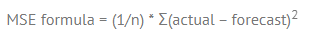
#### <ins><b> Root Mean Square Error:</b></ins> is an applied measure of the differences between numbers(population values and samples) which is predicted by an estimator. It describes the sample standard deviation of the differences between the predicted and observed values. 0.57 means that the model's performance is good

## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

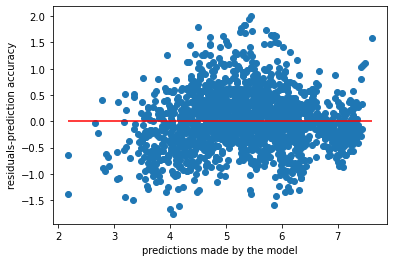

In [67]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.xlabel('predictions made by the model')
plt.ylabel('residuals-prediction accuracy')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
plt.show()

We want our predictions to be close to zero on the y-axis in this plot.

### Integration to Flask

In [31]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl', 'wb'))

In [34]:
model_1=pickle.load(open('model.pkl','rb'))

 @app that whenever a user visits our app domain (localhost:5000 for local servers) at the given .route(), execute the home() function. Flask uses the Jinja template library to render templates. In our application, we will use templates to render HTML which will display in the browser.